In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

### Parameters

In [38]:
initial_supply = 1e9
max_supply = 1e10
decay_constant = 0.04

### Calculate inflate rate

In [39]:
# Dynamically adjusted inflation function
def dynamic_inflation(t, current_supply, max_supply, decay_constant):
    remaining_supply_ratio = (max_supply - current_supply) / max_supply
    inflation_rate = decay_constant * remaining_supply_ratio
    return inflation_rate

# Function to calculate supply based on dynamic inflation rate
def calculate_supply_dynamic(initial_supply, max_supply, decay_constant, time_horizon):
    supply = [initial_supply]
    for t in range(1, int(time_horizon) + 1):
        current_supply = supply[-1]
        inflation_rate = dynamic_inflation(t, current_supply, max_supply, decay_constant)
        new_supply = current_supply * (1 + inflation_rate)
        supply.append(min(new_supply, max_supply))
    return np.array(supply)

### Plot function

In [40]:
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.facecolor': '#1f1f1f',
    'axes.edgecolor': '#2dff73',
    'axes.labelcolor': '#ffffff',
    'xtick.color': '#ffffff',
    'ytick.color': '#ffffff',
    'grid.color': '#2dff73',
    'figure.facecolor': '#000000',
    'figure.edgecolor': '#000000',
    'text.color': '#ffffff',
    'legend.facecolor': '#1f1f1f',
    'legend.edgecolor': '#2dff73',
    'axes.titlecolor': '#2dff73'
})

def plot_inflation_rate_and_supply_dynamic(decay_constant, time_horizon):
    # Time (years)
    years = np.arange(0, int(time_horizon) + 1)
    
    # Supply and inflation rates over time
    supply_dynamic = calculate_supply_dynamic(initial_supply, max_supply, decay_constant, time_horizon)
    inflation_rates_dynamic = [dynamic_inflation(t, supply_dynamic[t], max_supply, decay_constant) for t in range(int(time_horizon))]
    
    # Plotting Inflation Rates
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    plt.plot(years[:-1], inflation_rates_dynamic, label='Dynamic Inflation Rate', color='#2dff73')
    plt.axhline(y=0, color='#ff4c4c', linestyle='--', label='Zero Inflation')
    plt.title('Dynamic Inflation Rate Over Time')
    plt.xlabel('Months')
    plt.ylabel('Inflation Rate')
    plt.legend()
    plt.grid(True)
    
    # Plotting Supply
    plt.subplot(2, 1, 2)
    plt.plot(years, supply_dynamic, label='Dynamic Supply', color='#2dff73')
    plt.axhline(y=max_supply, color='#ff4c4c', linestyle='--', label='Max Supply')
    plt.title('Supply of DGYM Over Time')
    plt.xlabel('Months')
    plt.ylabel('Supply of DGYM')
    plt.legend()
    plt.grid(True)
    plt.ylim(initial_supply, max_supply)
    
    plt.tight_layout()
    plt.show()


### Display

In [ ]:
decay_constant_slider = FloatSlider(value=decay_constant, min=0.001, max=1.0, step=0.01, description='Decay Constant')
time_horizon_slider = FloatSlider(value=240, min=1, max=240, step=1, description='Time Horizon (Monthly)')

interact(plot_inflation_rate_and_supply_dynamic, 
         decay_constant=decay_constant_slider,
         time_horizon=time_horizon_slider)


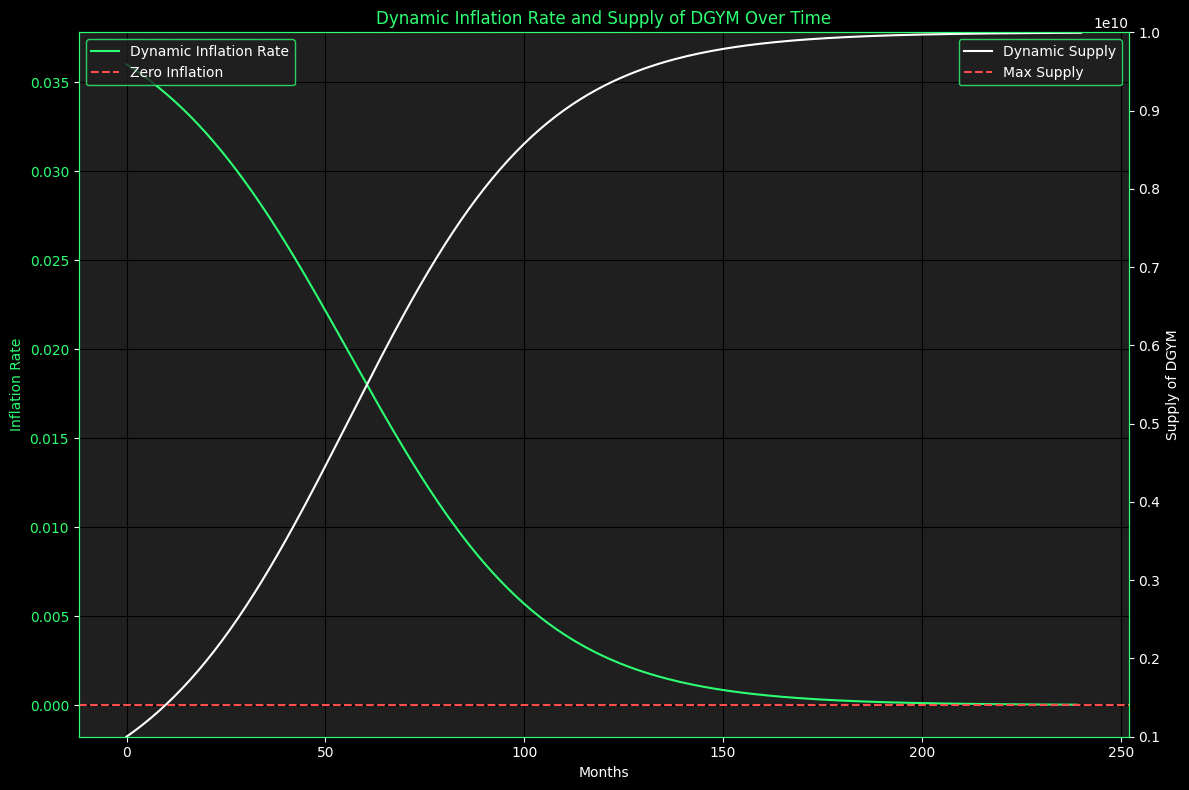

In [42]:
plt.style.use('dark_background')
plt.rcParams.update({
    'axes.facecolor': '#1f1f1f',
    'axes.edgecolor': '#2dff73',
    'axes.labelcolor': '#ffffff',
    'xtick.color': '#ffffff',
    'ytick.color': '#ffffff',
    'grid.color': '#000000',
    'figure.facecolor': '#000000',
    'figure.edgecolor': '#000000',
    'text.color': '#ffffff',
    'legend.facecolor': '#1f1f1f',
    'legend.edgecolor': '#2dff73',
    'axes.titlecolor': '#2dff73'
})

def plot_combined_dynamic_inflation_and_supply(decay_constant, time_horizon):
    # Time (months)
    months = np.arange(0, int(time_horizon) + 1)
    
    # Supply and inflation rates over time
    supply_dynamic = calculate_supply_dynamic(initial_supply, max_supply, decay_constant, time_horizon)
    inflation_rates_dynamic = [dynamic_inflation(t, supply_dynamic[t], max_supply, decay_constant) for t in range(int(time_horizon))]
    
    # Plotting both on a single figure
    fig, ax1 = plt.subplots(figsize=(12, 8))

    color1 = '#2dff73'
    ax1.set_xlabel('Months')
    ax1.set_ylabel('Inflation Rate', color=color1)
    ax1.plot(months[:-1], inflation_rates_dynamic, label='Dynamic Inflation Rate', color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.axhline(y=0, color='#ff4c4c', linestyle='--', label='Zero Inflation')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color2 = '#ffffff'
    ax2.set_ylabel('Supply of DGYM', color=color2)
    ax2.plot(months, supply_dynamic, label='Dynamic Supply', color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.axhline(y=max_supply, color='#ff4c4c', linestyle='--', label='Max Supply')
    ax2.legend(loc='upper right')
    ax2.set_ylim(initial_supply, max_supply)
    
    plt.title('Dynamic Inflation Rate and Supply of DGYM Over Time')
    fig.tight_layout()
    plt.show()

# Plot the combined graph with default values
plot_combined_dynamic_inflation_and_supply(decay_constant, 240)
